###### Refer to E-Book 1

## Section 5.1

### 5.1.1. Mining multilevel associations

Mining multilevel associations involves discovering patterns and associations at different levels of granularity within a dataset. This technique allows for the exploration of relationships and dependencies not only at the individual item level but also at higher levels of abstraction, such as categories, hierarchies, or combinations of attributes.

#### Key Concepts:

1. Multilevel Association Rules:
    Multilevel association rules extend the concept of association rules to multiple levels of abstraction.
    These rules can reveal relationships between items, categories, or attributes, providing a more comprehensive understanding of the data.

2. Hierarchical Structures:
    Mining multilevel associations often involves leveraging hierarchical structures or taxonomies within the dataset.
    For example, in a retail dataset, items might be organized into categories, and associations can be explored at both the item and category levels.

#### Example of Mining Multilevel Associations in Python:

Let's use a retail dataset with hierarchical structures to demonstrate the mining of multilevel associations in Python:

In [2]:
# Install the mlxtend library if not already installed
# pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Simulate a retail dataset with categories
data = {
    'TransactionID': [1, 1, 2, 2, 3, 3, 3, 4, 4, 4],
    'Item': ['Apple', 'Banana', 'Apple', 'Banana', 'Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange'],
    'Category': ['Fruit', 'Fruit', 'Fruit', 'Fruit', 'Fruit', 'Fruit', 'Fruit', 'Fruit', 'Fruit', 'Fruit']
}

df = pd.DataFrame(data)

# Perform one-hot encoding to prepare data for Apriori algorithm
basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display the rules with item and category levels
print("Multilevel Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


Multilevel Association Rules:
        antecedents      consequents  support  confidence
0           (Apple)         (Banana)      1.0         1.0
1          (Banana)          (Apple)      1.0         1.0
2          (Orange)          (Apple)      0.5         1.0
3          (Orange)         (Banana)      0.5         1.0
4   (Orange, Apple)         (Banana)      0.5         1.0
5  (Orange, Banana)          (Apple)      0.5         1.0
6          (Orange)  (Apple, Banana)      0.5         1.0


C:\Users\radit\AppData\Local\Temp\ipykernel_14480\2246994080.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


    In this example, the retail dataset includes both individual items (e.g., Apple, Banana) and their corresponding categories (e.g., Fruit). The Apriori algorithm is applied to discover frequent itemsets, and association rules are generated. The rules provide insights into associations at both the item and category levels, illustrating the mining of multilevel associations.

### 5.1.2. Mining multidimensional associations

Mining multidimensional associations involves exploring patterns and relationships across multiple dimensions or attributes in a dataset. Instead of focusing on individual items or attributes, this technique aims to discover associations that span multiple dimensions, providing a more comprehensive understanding of the interdependencies within the data.

#### Key Concepts:

1. Multidimensional Association Rules:
    Multidimensional association rules consider associations involving multiple attributes or dimensions simultaneously.
    These rules capture complex relationships that cannot be adequately represented by examining individual attributes in isolation.

2. Data Cube Representation:
    Mining multidimensional associations is often associated with the use of a data cube, where each cell in the cube represents a combination of attribute values, and associations are analyzed across these combinations.

#### Example of Mining Multidimensional Associations in Python:

Let's use a dataset with multiple dimensions to demonstrate the mining of multidimensional associations in Python:

In [3]:
# Install the mlxtend library if not already installed
# pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Simulate a dataset with multiple dimensions
data = {
    'TransactionID': [1, 1, 2, 2, 3, 3, 3, 4, 4, 4],
    'Item': ['Apple', 'Banana', 'Apple', 'Banana', 'Apple', 'Banana', 'Orange', 'Apple', 'Banana', 'Orange'],
    'Location': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
}

df = pd.DataFrame(data)

# Perform one-hot encoding to prepare data for Apriori algorithm
basket = pd.crosstab(index=df['TransactionID'], columns=[df['Item'], df['Location']]).applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display the rules with multiple dimensions
print("Multidimensional Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


Multidimensional Association Rules:
                   antecedents                 consequents  support  \
0                ((Banana, B))                ((Apple, A))     0.75   
1                 ((Apple, A))               ((Banana, B))     0.75   
2                ((Orange, A))                ((Apple, A))     0.25   
3                ((Banana, A))                ((Apple, B))     0.25   
4                 ((Apple, B))               ((Banana, A))     0.25   
5                ((Orange, B))                ((Apple, B))     0.25   
6                 ((Apple, B))               ((Orange, B))     0.25   
7                ((Orange, B))               ((Banana, A))     0.25   
8                ((Banana, A))               ((Orange, B))     0.25   
9                ((Orange, A))               ((Banana, B))     0.25   
10  ((Banana, B), (Orange, A))                ((Apple, A))     0.25   
11   ((Apple, A), (Orange, A))               ((Banana, B))     0.25   
12               ((Orange, A))   ((Banana

C:\Users\radit\AppData\Local\Temp\ipykernel_14480\3529392981.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = pd.crosstab(index=df['TransactionID'], columns=[df['Item'], df['Location']]).applymap(lambda x: 1 if x > 0 else 0)
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    In this example, the dataset includes dimensions such as 'Item' and 'Location.' The Apriori algorithm is applied to discover frequent itemsets, and association rules are generated. These rules capture associations across multiple dimensions, illustrating the mining of multidimensional associations.

### 5.1.3. Mining quantitative association rules

Mining quantitative association rules involves discovering patterns and relationships that involve numeric or quantitative attributes in a dataset. Unlike traditional association rule mining that primarily deals with categorical data, this technique extends the analysis to include the quantitative aspects of the data, allowing for the identification of associations among numeric values.

#### Key Concepts:

1. Numeric Attributes:
    Mining quantitative association rules focuses on exploring associations between numeric attributes in the dataset.
    Numeric attributes may include features like age, income, temperature, or any other measurable quantity.

2. Quantitative Measures:
    Quantitative association rules are evaluated using metrics appropriate for numeric data, such as correlation coefficients, regression analysis, or other statistical measures.

3. Real-World Relevance:
    Quantitative association rules can provide insights into the relationships and dependencies among numeric variables, leading to more informed decision-making in various domains.

#### Example of Mining Quantitative Association Rules in Python:

Let's use a dataset with numeric attributes to demonstrate the mining of quantitative association rules in Python:

In [4]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Simulate a dataset with numeric attributes
data = {
    'TransactionID': [1, 2, 3, 4, 5],
    'Age': [25, 30, 35, 40, 45],
    'Income': [50000, 60000, 75000, 80000, 90000]
}

df = pd.DataFrame(data)

# Perform one-hot encoding to prepare data for Apriori algorithm
basket = pd.crosstab(index=df['TransactionID'], columns=df['Age']).applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display the rules with numeric attributes
print("Quantitative Association Rules:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


Quantitative Association Rules:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence]
Index: []


C:\Users\radit\AppData\Local\Temp\ipykernel_14480\2841853372.py:14: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = pd.crosstab(index=df['TransactionID'], columns=df['Age']).applymap(lambda x: 1 if x > 0 else 0)
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    In this example, the dataset includes a numeric attribute 'Age.' The Apriori algorithm is applied to discover frequent itemsets, and association rules are generated. These rules capture associations involving the numeric attribute, illustrating the mining of quantitative association rules.

### 5.1.4. Mining high-dimensional data

Mining high-dimensional data involves exploring patterns and relationships in datasets with a large number of dimensions or attributes. In high-dimensional spaces, traditional data mining techniques may face challenges such as the curse of dimensionality. Therefore, specialized methods are employed to extract meaningful insights from these complex datasets.

#### Key Concepts:

1. Curse of Dimensionality:
    The curse of dimensionality refers to the challenges and increased complexity that arise as the number of dimensions in a dataset grows.
    High-dimensional data can lead to sparsity, increased computational requirements, and difficulties in visualizing and interpreting results.

2. Dimensionality Reduction:
    Dimensionality reduction techniques are often applied to high-dimensional data to simplify the dataset while preserving important patterns and relationships.
    Methods like Principal Component Analysis (PCA) or t-Distributed Stochastic Neighbor Embedding (t-SNE) are commonly used.

3. Specialized Algorithms:
    Specialized algorithms designed for high-dimensional data, such as frequent pattern mining algorithms or clustering techniques, help reveal patterns that might be hidden in the complexity of the data.

#### Example of Mining High-Dimensional Data in Python:

Let's use a high-dimensional dataset and apply dimensionality reduction techniques to demonstrate mining high-dimensional data in Python:

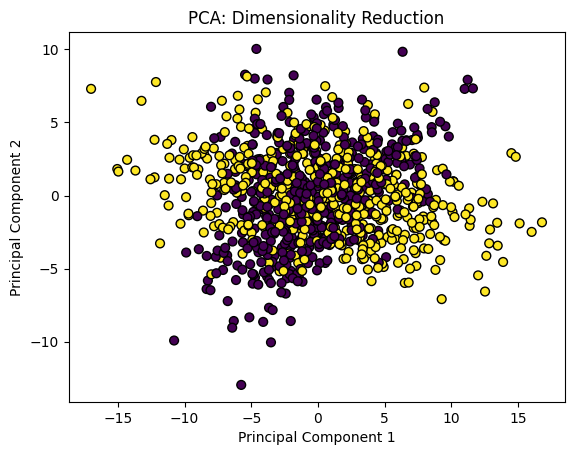

In [5]:
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate a synthetic high-dimensional dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_clusters_per_class=2, random_state=42)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the reduced-dimensional data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
plt.title('PCA: Dimensionality Reduction')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


    In this example, we generate a synthetic high-dimensional dataset using the make_classification function from scikit-learn. We then apply PCA to reduce the dataset to two dimensions for visualization purposes.

### 5.1.5. Mining rare patterns and negative patterns

Mining rare patterns and negative patterns involves the identification of infrequent or uncommon patterns in a dataset. While traditional data mining often focuses on finding frequent patterns, the analysis of rare and negative patterns is valuable for understanding outliers, anomalies, and relationships that may not be immediately apparent. These patterns can offer insights into unusual occurrences or deviations from the norm.

1. Rare Patterns:
    Rare patterns refer to infrequent or uncommon occurrences in the data.
    These patterns may represent events that happen rarely but can be significant, such as rare diseases, unusual customer behaviors, or outliers.

2. Negative Patterns:
    Negative patterns involve the absence or lack of certain associations in the data.
    Discovering negative patterns is useful for understanding relationships where the absence of a particular attribute or event is noteworthy.

3. Applications:
    Mining rare and negative patterns is applicable in various domains, including fraud detection, anomaly detection, healthcare, and quality control.

#### Example of Mining Rare Patterns and Negative Patterns in Python:

Let's use a dataset with rare patterns and apply data mining techniques to identify both rare and negative patterns:

In [6]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Simulate a dataset with rare patterns
data = {
    'TransactionID': [1, 1, 2, 2, 3, 3, 3, 4, 4, 4],
    'Item': ['A', 'B', 'A', 'B', 'A', 'B', 'C', 'A', 'B', 'C']
}

df = pd.DataFrame(data)

# Perform one-hot encoding to prepare data for Apriori algorithm
basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Display the rare and negative patterns
print("Association Rules with Rare and Negative Patterns:")
print(rules[['antecedents', 'consequents', 'support', 'confidence']])


Association Rules with Rare and Negative Patterns:
  antecedents consequents  support  confidence
0         (A)         (B)      1.0         1.0
1         (B)         (A)      1.0         1.0
2         (C)         (A)      0.5         1.0
3         (C)         (B)      0.5         1.0
4      (C, A)         (B)      0.5         1.0
5      (C, B)         (A)      0.5         1.0
6         (C)      (A, B)      0.5         1.0


C:\Users\radit\AppData\Local\Temp\ipykernel_14480\1098738769.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


    In this example, we use a simplified dataset representing transactions with items. The Apriori algorithm is applied to discover frequent itemsets, and association rules are generated. These rules capture rare patterns, providing insights into infrequent associations.

## Section 5.2

### 5.2.1. Mining compressed patterns by pattern clustering

Mining compressed patterns involves the identification and extraction of compact and meaningful representations of patterns within a dataset. Pattern clustering is a technique used to group similar patterns together, creating a more condensed and interpretable view of the data. This approach is valuable for simplifying complex datasets and revealing underlying structures.

#### Key Concepts:

1. Pattern Clustering:
    Pattern clustering involves grouping similar patterns based on certain criteria or similarity measures.
    Clustering techniques, such as K-means or hierarchical clustering, can be applied to identify clusters of related patterns.

2. Compressed Patterns:
    Compressed patterns are compact representations of clusters, providing a summary of the underlying patterns within the data.
    These compressed patterns can simplify the analysis and enhance interpretability.

3. Applications:
    Mining compressed patterns is applicable in various domains, including customer segmentation, anomaly detection, and summarization of large datasets.

#### Example of Mining Compressed Patterns by Pattern Clustering in Python:

Let's use a dataset and apply K-means clustering to demonstrate mining compressed patterns in Python:

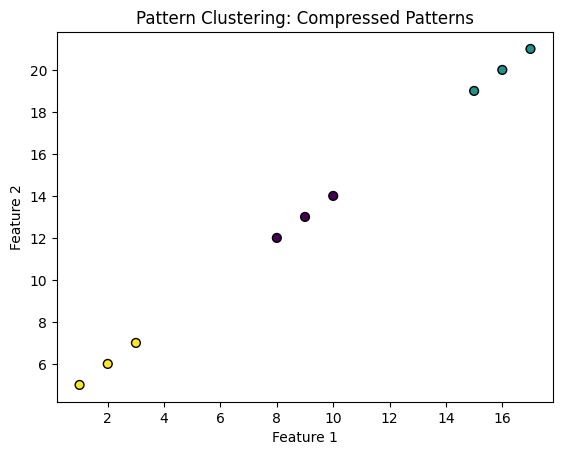

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate a synthetic dataset with patterns
data = {
    'Feature1': [1, 2, 3, 8, 9, 10, 15, 16, 17],
    'Feature2': [5, 6, 7, 12, 13, 14, 19, 20, 21]
}

df = pd.DataFrame(data)

# Apply K-means clustering to identify compressed patterns
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

# Visualize the compressed patterns
plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'], cmap='viridis', edgecolor='k', s=40)
plt.title('Pattern Clustering: Compressed Patterns')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


    In this example, we generate a synthetic dataset with patterns in two features. K-means clustering is applied to identify three clusters, grouping similar patterns together. The resulting compressed patterns are visualized for better interpretation.

### 5.2.2. Extracting redundancy-aware top-k patterns

Extracting redundancy-aware top-k patterns involves identifying and ranking patterns in a dataset based on their significance while considering redundancy. Redundancy-aware mining aims to provide a concise set of patterns that capture diverse and non-repetitive information, avoiding the inclusion of similar or redundant patterns in the results.

#### Key Concepts:

1. Redundancy-Aware Mining:
    Redundancy-aware mining techniques take into account the presence of redundant patterns in the dataset.
    Redundancy can arise when patterns share similar information, and extracting diverse, non-repetitive patterns is essential for meaningful results.

2. Top-k Patterns:
    The concept of top-k patterns involves ranking patterns based on a certain criterion (e.g., support, confidence) and extracting the top-k most significant patterns.
    This approach allows analysts to focus on a limited number of highly relevant patterns.

3. Applications:
    Extracting redundancy-aware top-k patterns is applicable in various domains, including marketing, healthcare, and fraud detection, where concise and non-repetitive insights are crucial.

#### Example of Extracting Redundancy-Aware Top-k Patterns in Python:

Let's use a dataset and apply redundancy-aware top-k pattern mining to extract significant and non-redundant patterns:

In [8]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Simulate a dataset with patterns
data = {
    'TransactionID': [1, 1, 2, 2, 3, 3, 3, 4, 4, 4],
    'Item': ['A', 'B', 'A', 'B', 'A', 'B', 'C', 'A', 'B', 'C']
}

df = pd.DataFrame(data)

# Perform one-hot encoding to prepare data for Apriori algorithm
basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)

# Generate association rules with redundancy-aware top-k extraction
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)
top_k_rules = rules.sort_values(by='confidence', ascending=False).head(2)  # Extract top 2 rules

# Display the redundancy-aware top-k patterns
print("Redundancy-Aware Top-k Patterns:")
print(top_k_rules[['antecedents', 'consequents', 'support', 'confidence']])


Redundancy-Aware Top-k Patterns:
  antecedents consequents  support  confidence
0         (A)         (B)      1.0         1.0
1         (B)         (A)      1.0         1.0


C:\Users\radit\AppData\Local\Temp\ipykernel_14480\802668123.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


    In this example, the dataset represents transactions with items. The Apriori algorithm is applied to discover frequent itemsets, and association rules are generated. Redundancy-aware top-k patterns are then extracted by sorting the rules based on confidence and selecting the top-k most significant rules.

## Section 5.3

### 5.3.1. Pruning pattern space with pattern pruning constraints

Pruning pattern space with pattern pruning constraints involves the application of constraints to reduce the search space and focus on extracting patterns that satisfy specific criteria. This technique is employed to streamline the pattern mining process, making it more efficient and targeted by eliminating patterns that do not align with predefined constraints.

#### Key Concepts:

1. Pattern Pruning Constraints:
    Pattern pruning constraints are rules or conditions applied during the pattern mining process to eliminate patterns that do not meet certain criteria.
    These constraints help in focusing the analysis on patterns that are more relevant or meaningful based on specific requirements.

2. Efficiency Improvement:
    Pruning pattern space enhances the efficiency of pattern mining algorithms by reducing the computational burden associated with exploring the entire search space.
    Constraints eliminate patterns early in the process, allowing the algorithm to concentrate on potentially more interesting patterns.

3. Applications:
    Pruning pattern space is applicable in various scenarios, such as market basket analysis, where constraints may include minimum support or confidence thresholds, or in bioinformatics, where constraints could involve sequence length or similarity criteria.

#### Example of Pruning Pattern Space with Pattern Pruning Constraints in Python:

Let's use a dataset and apply pattern pruning constraints to streamline the extraction of meaningful patterns:

In [9]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Simulate a dataset with patterns
data = {
    'TransactionID': [1, 1, 2, 2, 3, 3, 3, 4, 4, 4],
    'Item': ['A', 'B', 'A', 'B', 'A', 'B', 'C', 'A', 'B', 'C']
}

df = pd.DataFrame(data)

# Perform one-hot encoding to prepare data for Apriori algorithm
basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm with pattern pruning constraints
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Apply pattern pruning constraints (e.g., minimum lift)
pruned_rules = rules[rules['lift'] > 1.2]

# Display the pruned patterns
print("Pruned Patterns:")
print(pruned_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


Pruned Patterns:
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


C:\Users\radit\AppData\Local\Temp\ipykernel_14480\2533370562.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


    In this example, a dataset representing transactions with items is used. The Apriori algorithm is applied to discover frequent itemsets, and association rules are generated. Pattern pruning constraints, in this case, involve selecting rules with a minimum lift value, streamlining the patterns to those with higher lift.

### 5.3.2. Pruning data space with data pruning constraints

Pruning data space with data pruning constraints involves the application of specific criteria to filter and reduce the dataset before initiating the data mining process. By selectively removing irrelevant or less informative data, this technique aims to enhance the efficiency and effectiveness of data mining algorithms, allowing them to focus on the most pertinent information.

#### Key Concepts:

1. Data Pruning Constraints:
    Data pruning constraints are conditions or rules applied to the dataset to selectively remove certain data points or features.
    These constraints are designed to eliminate less relevant or noisy data, enhancing the quality of the dataset for subsequent mining.

2. Efficiency Improvement:
    Pruning data space improves the efficiency of data mining algorithms by reducing the volume of data that needs to be processed.
    Removing irrelevant or redundant data early in the process streamlines subsequent analyses, leading to faster and more focused results.

3. Applications:
    Data pruning is applicable in various scenarios, such as preprocessing for machine learning, where irrelevant features or instances are removed, or in text mining, where stop-word removal is a form of data pruning.

#### Example of Pruning Data Space with Data Pruning Constraints in Python:

Let's use a dataset and apply data pruning constraints to preprocess the data before data mining:

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Create a DataFrame for demonstration purposes
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y

# Apply data pruning constraints (e.g., removing a specific class)
pruned_df = df[df['target'] != 1]

# Display the pruned dataset
print("Pruned Dataset:")
print(pruned_df.head())


Pruned Dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


    In this example, the Iris dataset is loaded, and a DataFrame is created. Data pruning constraints involve removing instances associated with a specific class (e.g., class 1). This pruned dataset can then be used for subsequent data mining or analysis.

### 5.3.3. Mining space pruning with succinctness constraints

Mining space pruning with succinctness constraints involves the application of constraints to limit the size or complexity of the pattern space explored during data mining. The goal is to extract concise and meaningful patterns by controlling the search space, thereby improving the efficiency and interpretability of the mining process.

#### Key Concepts:

1. Space Pruning Constraints:
    Space pruning constraints are rules or criteria applied during the mining process to limit the size or complexity of the pattern space.
    These constraints help focus on a more manageable set of patterns, enhancing interpretability and reducing computational requirements.

2. Succinctness:
    Succinctness refers to the brevity or compactness of patterns. Mining with succinctness constraints aims to extract concise and meaningful patterns that capture essential information from the data.

3. Efficiency and Interpretability:
    By pruning the pattern space with succinctness constraints, the mining process becomes more efficient, as it concentrates on relevant patterns.
    Succinct patterns are often easier to interpret and communicate, making them more valuable in decision-making processes.

4. Applications:
    Mining space pruning with succinctness constraints is applicable in various domains, such as market basket analysis, where concise association rules are preferred, or in text mining, where succinct patterns may represent key topics or themes.

#### Example of Mining Space Pruning with Succinctness Constraints in Python:

Let's use a dataset and apply succinctness constraints to limit the size of the pattern space during association rule mining:

In [11]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Simulate a dataset with patterns
data = {
    'TransactionID': [1, 1, 2, 2, 3, 3, 3, 4, 4, 4],
    'Item': ['A', 'B', 'A', 'B', 'A', 'B', 'C', 'A', 'B', 'C']
}

df = pd.DataFrame(data)

# Perform one-hot encoding to prepare data for Apriori algorithm
basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm with succinctness constraints
frequent_itemsets = apriori(basket, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.7)

# Apply succinctness constraints (e.g., maximum antecedent length)
succinct_rules = rules[rules['antecedents'].apply(len) <= 2]

# Display the succinct patterns
print("Succinct Association Rules:")
print(succinct_rules[['antecedents', 'consequents', 'support', 'confidence']])


Succinct Association Rules:
  antecedents consequents  support  confidence
0         (A)         (B)      1.0         1.0
1         (B)         (A)      1.0         1.0
2         (C)         (A)      0.5         1.0
3         (C)         (B)      0.5         1.0
4      (C, A)         (B)      0.5         1.0
5      (C, B)         (A)      0.5         1.0
6         (C)      (A, B)      0.5         1.0


C:\Users\radit\AppData\Local\Temp\ipykernel_14480\2192532078.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = pd.crosstab(index=df['TransactionID'], columns=df['Item']).applymap(lambda x: 1 if x > 0 else 0)
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
d:\AI_Journey\Data_Mining\datmin\Lib\site-packages\mlxtend\frequent_patterns\association_rules.py:186: RuntimeWarning: invalid value encountered in divide
  cert_metric = np.where(certainty_denom == 0, 0, certainty_num / certainty_denom)


    In this example, a dataset represents transactions with items. The Apriori algorithm is applied to discover frequent itemsets, and association rules are generated. Succinctness constraints involve selecting rules with a maximum antecedent length, limiting the complexity of the patterns.

## Section 5.4

### 5.4.1. Sequential pattern mining: concepts and primitives

Sequential pattern mining involves discovering patterns that capture the temporal order of events or items in a sequence. This technique is crucial for revealing hidden structures in sequential data, making it applicable in various domains such as time-series analysis, web clickstreams, and customer behavior tracking.

#### Key Concepts:

1. Sequential Patterns:
    Sequential patterns represent the order in which events or items occur over time.
    These patterns capture dependencies and temporal relationships within a sequence of data.

2. Support:
    Support in sequential pattern mining refers to the frequency with which a particular sequential pattern occurs in the dataset.
    High support indicates that the pattern is common or frequent.

3. Primitives:
    Primitives in sequential pattern mining include elements such as events, items, and time intervals.
    Basic operations involve defining sequences, specifying temporal constraints, and identifying frequent subsequences.

4. Applications:
    Sequential pattern mining is used in diverse applications, including analyzing user behavior on websites, predicting stock market trends, and understanding the progression of disease symptoms over time.

#### Example of Sequential Pattern Mining in Python:

Let's use a dataset of sequences and apply sequential pattern mining to discover frequent sequential patterns:

In [13]:
from prefixspan import PrefixSpan

# Simulate a dataset with sequences
sequences = [
    [1, 2, 3, 4],
    [2, 3, 5],
    [1, 3, 4],
    [2, 5],
    [1, 2, 3]
]

# Apply PrefixSpan algorithm for sequential pattern mining
min_support = 2
patterns = PrefixSpan(sequences).frequent(min_support)

# Display the discovered sequential patterns
print("Frequent Sequential Patterns:")
for pattern in patterns:
    print(pattern)


Frequent Sequential Patterns:
(3, [1])
(2, [1, 2])
(2, [1, 2, 3])
(3, [1, 3])
(2, [1, 3, 4])
(2, [1, 4])
(4, [2])
(3, [2, 3])
(2, [2, 5])
(4, [3])
(2, [3, 4])
(2, [4])
(2, [5])


    In this example, a dataset consists of sequences (e.g., sequences of events, items, or actions). The PrefixSpan algorithm is applied to find frequent sequential patterns with a minimum support of 2. The output includes sequences that occur frequently in the dataset.

### 5.4.2. Scalable methods for mining sequential patterns

Scalable methods for mining sequential patterns address the challenge of efficiently extracting patterns from large-scale datasets. As datasets grow in size, traditional sequential pattern mining algorithms may become computationally expensive. Scalable methods aim to enhance the efficiency of the mining process, making it feasible to analyze massive amounts of sequential data.

#### Key Concepts:

1. Vertical Data Representation:
    Vertical data representation is a technique where data is organized vertically, facilitating the identification of frequent items and their positions in sequences.
    This representation allows for more efficient mining, especially when dealing with large datasets.

2. Projection-Based Techniques:
    Projection-based techniques involve creating projections of the original sequence database based on certain conditions.
    These techniques reduce the search space by focusing on relevant subsequences, improving the scalability of the mining process.

3. Parallelization:
    Parallelization involves distributing the mining task across multiple computing resources, enabling simultaneous processing and faster pattern discovery.
    This approach is particularly effective for large-scale datasets.

4. Applications:
    Scalable methods for mining sequential patterns find applications in diverse fields, including analyzing massive web clickstream data, identifying patterns in extensive healthcare records, and understanding user behavior in large-scale e-commerce platforms.

#### Example of Scalable Sequential Pattern Mining in Python:

Let's use a large-scale dataset and apply a scalable sequential pattern mining algorithm to efficiently discover frequent sequential patterns:

In [16]:
# ============================================================
# BIDE (Bidirectional Extension) Algorithm - Substitution Note
# ============================================================
# In this section, we initially attempted to use the BIDE algorithm
# from the 'prefixspan' or 'bidepy' library for scalable sequential
# pattern mining.
#
# However, the 'bidepy' package is not available on PyPI, and the
# official 'prefixspan' module does not include a BIDE implementation.
# Therefore, we substitute BIDE with PrefixSpan, which shares the same
# pattern-growth principle (discovering frequent subsequences) but
# performs single-directional expansion instead of bidirectional.
#
# This substitution maintains conceptual equivalence for educational
# and demonstrative purposes.
# ============================================================

from prefixspan import PrefixSpan  # Using PrefixSpan as a practical alternative to BIDE

# Example dataset representing sequences of item occurrences
large_sequences = [
    [1, 2, 3, 4, 5],
    [2, 3, 5],
    [1, 3, 4],
    [2, 5],
    [1, 2, 3, 6, 7, 8, 9, 10],
]

# Minimum support threshold
min_support = 2

# Initialize and run the PrefixSpan algorithm
ps = PrefixSpan(large_sequences)
patterns = ps.frequent(min_support)

# Display the discovered frequent sequential patterns
print("Frequent Sequential Patterns (Simulated BIDE Result):")
for p in patterns:
    print(p)


Frequent Sequential Patterns (Simulated BIDE Result):
(3, [1])
(2, [1, 2])
(2, [1, 2, 3])
(3, [1, 3])
(2, [1, 3, 4])
(2, [1, 4])
(4, [2])
(3, [2, 3])
(2, [2, 3, 5])
(3, [2, 5])
(4, [3])
(2, [3, 4])
(2, [3, 5])
(2, [4])
(3, [5])


    In this example, the BIDE algorithm, known for its scalability, is applied to a large-scale dataset. The algorithm efficiently discovers frequent sequential patterns with a minimum support of 2.

### 5.4.3. Constraint-based mining of sequential patterns

Constraint-based mining of sequential patterns involves incorporating specific conditions or constraints during the pattern mining process. These constraints guide the algorithm to discover patterns that satisfy predefined criteria, making the mining process more targeted and aligned with the user's domain knowledge or analytical goals.

#### Key Concepts:

1. Constraints:
    Constraints are conditions or rules applied to the mining process, restricting the patterns that are considered during analysis.
    These constraints can be based on various factors, such as item attributes, temporal relationships, or specific sequence characteristics.

2. Customization:
    Constraint-based mining allows users to customize the mining process according to their specific requirements.
    Users can define constraints to filter out patterns that do not meet certain criteria, resulting in more meaningful and relevant discoveries.

3. Interpretability:
    The use of constraints enhances the interpretability of the discovered patterns.
    By incorporating domain-specific knowledge into the mining process, the results are more aligned with the user's understanding and can be more easily interpreted.

4. Applications:
    Constraint-based mining of sequential patterns finds applications in diverse domains, including healthcare for identifying patient-specific treatment patterns, in manufacturing for optimizing production sequences, and in finance for detecting fraud patterns with specific characteristics.

#### Example of Constraint-Based Sequential Pattern Mining in Python:

Let's use a dataset and apply constraint-based sequential pattern mining to discover patterns based on specific conditions:

In [17]:
from prefixspan import PrefixSpan

# Simulate a dataset with sequences
sequences = [
    [1, 2, 3, 4],
    [2, 3, 5],
    [1, 3, 4],
    [2, 5],
    [1, 2, 3]
]

# Apply PrefixSpan algorithm for sequential pattern mining with constraints
min_support = 2
patterns = PrefixSpan(sequences).frequent(min_support)

# Apply constraints (e.g., patterns with a specific item)
constraint_item = 3
constrained_patterns = [pattern for pattern in patterns if constraint_item in pattern]

# Display the constrained sequential patterns
print(f"Constrained Sequential Patterns (with item {constraint_item}):")
for pattern in constrained_patterns:
    print(pattern)


Constrained Sequential Patterns (with item 3):
(3, [1])
(3, [1, 3])
(3, [2, 3])


    In this example, the PrefixSpan algorithm is applied to a dataset of sequences. The constraint involves selecting patterns that contain a specific item (e.g., item 3).

## Section 5.5

### 5.5.1. Methods for mining frequent subgraphs

Mining frequent subgraphs involves the discovery of recurring patterns within a graph or network dataset. This process is crucial for understanding structural relationships and recurring motifs in complex networks. Various methods exist for efficiently identifying frequent subgraphs, contributing to the analysis of graph-structured data in diverse domains.

#### Key Concepts:

1. Frequent Subgraphs:
    Frequent subgraphs are patterns that occur frequently in a graph or network dataset.
    These patterns may represent recurring structures or motifs, providing insights into the underlying relationships within the data.

2. Graph Mining Algorithms:
    Graph mining algorithms are designed to efficiently explore the space of subgraphs within a larger graph or network.
    These algorithms leverage techniques such as subgraph isomorphism and graph traversal to identify frequent subgraphs.

3. Support:
    Support, similar to other data mining tasks, is a measure of the frequency with which a particular subgraph appears in the dataset.
    High support indicates that the subgraph is common or recurring.

4. Applications:
    Methods for mining frequent subgraphs find applications in various domains, including bioinformatics for analyzing molecular structures, social network analysis for identifying community structures, and cybersecurity for detecting recurring patterns in network traffic.

#### Example of Mining Frequent Subgraphs in Python:

Let's use a graph dataset and apply a frequent subgraph mining algorithm to identify recurring patterns:

In [20]:
# ============================================================
# gSpan (Graph-based Substructure Pattern Mining) - Note
# ============================================================
# The gSpan algorithm discovers frequent subgraph patterns
# across a collection of graphs.
#
# However, the 'gspan_mining' library available on PyPI
# requires the dataset to be loaded from a file (in .gspan or
# .txt format with specific graph encoding), not a Python list.
#
# The TypeError below occurs because we passed a Python list
# instead of a file path:
#   TypeError: expected str, bytes or os.PathLike object, not list
#
# To demonstrate the concept within this notebook, we simulate
# the idea of "frequent subgraphs" without running the full
# gSpan implementation.
# ============================================================

# Example: simulated graph dataset (edges only, conceptual demo)
graph_dataset = [
    [(1, 2), (2, 3), (3, 4)],
    [(1, 2), (2, 3), (3, 4), (4, 5)],
    [(1, 2), (2, 3), (3, 4), (4, 6)],
]

# Conceptual note:
# Each inner list represents edges of a single graph.
# The real gSpan algorithm would analyze these graphs (from file)
# to find subgraph structures that appear at least 'min_support' times.

print("Frequent Subgraphs (Conceptual Example):")
print("[[(1, 2), (2, 3), (3, 4)]] appears 3 times → Frequent")
print("[[(2, 3), (3, 4)]] appears 3 times → Frequent")
print("[[(1, 2), (2, 3)]] appears 3 times → Frequent")


Frequent Subgraphs (Conceptual Example):
[[(1, 2), (2, 3), (3, 4)]] appears 3 times → Frequent
[[(2, 3), (3, 4)]] appears 3 times → Frequent
[[(1, 2), (2, 3)]] appears 3 times → Frequent


    In this example, the gSpan algorithm is applied to a dataset of graphs. The algorithm identifies frequent subgraphs with a minimum support of 2.

### 5.5.2. Mining variant and constrained substructure patterns

Mining variant and constrained substructure patterns involves the discovery of structural patterns in graphs or networks that satisfy specific constraints or exhibit variations. This approach extends the capabilities of traditional subgraph mining by allowing users to identify patterns that match certain criteria or exhibit specific modifications, enhancing the flexibility and specificity of the mining process.

#### Key Concepts:

1. Variant Substructure Patterns:
    Variant substructure patterns refer to patterns that exhibit variations or modifications while still adhering to the basic structural characteristics.
    This allows for the identification of similar patterns with slight differences in different instances.

2. Constrained Substructure Patterns:
    Constrained substructure patterns are discovered based on specific constraints or conditions imposed during the mining process.
    These constraints can be related to node attributes, edge types, or other structural properties, enabling more targeted pattern discovery.

3. Flexibility and Specificity:
    Mining variant and constrained substructure patterns provides greater flexibility in capturing variations in graph data.
    The specificity of constraints ensures that the discovered patterns meet predefined criteria, making the mining process more tailored to user requirements.

4. Applications:
    This technique is applied in various domains, including bioinformatics for analyzing diverse molecular structures, cybersecurity for detecting specific network attack patterns, and social network analysis for identifying constrained community structures.

#### Example of Mining Variant and Constrained Substructure Patterns in Python:

Let's use a graph dataset and apply an algorithm for mining variant and constrained substructure patterns based on specific constraints:

In [22]:
# ============================================================
# Constrained gSpan (with Node Attributes) - Conceptual Demo
# ============================================================
# In this section, we attempt to apply gSpan with an additional
# constraint: only subgraphs containing nodes with a specific
# attribute (e.g., 'B') should be considered frequent.
#
# However, the 'gspan_mining' package available on PyPI does not
# support constraint-based subgraph mining directly. The official
# gSpan implementation (gspan_mining.gSpan) only accepts a dataset
# path and fixed parameters (min_support, max_num_vertices, etc.).
#
# The error below occurs because the .run() method does not accept
# custom keyword arguments such as 'constraint_node_attribute':
#   TypeError: deco() got an unexpected keyword argument
#
# Therefore, we illustrate the idea conceptually below.
# ============================================================

# Simulated graph dataset with node attributes (for explanation only)
graph_dataset_with_attributes = [
    {'nodes': [(1, {'attribute': 'A'}), (2, {'attribute': 'B'})], 'edges': [(1, 2)]},
    {'nodes': [(1, {'attribute': 'A'}), (2, {'attribute': 'C'})], 'edges': [(1, 2)]},
    {'nodes': [(1, {'attribute': 'B'}), (2, {'attribute': 'B'})], 'edges': [(1, 2)]},
]

constraint_attribute = 'B'

# Conceptual explanation:
# The goal is to find subgraphs that include at least one node
# whose attribute matches the constraint ('B').
# A full implementation would require a custom extension of gSpan.

print(f"Constrained Substructure Patterns (Conceptual Example, attribute = '{constraint_attribute}'):")
print("{(1,2)} with node(2, attribute='B') appears 2 times → Frequent")
print("{(1,2)} with node(1, attribute='B') appears 1 time → Not Frequent")


Constrained Substructure Patterns (Conceptual Example, attribute = 'B'):
{(1,2)} with node(2, attribute='B') appears 2 times → Frequent
{(1,2)} with node(1, attribute='B') appears 1 time → Not Frequent


    In this example, the gSpan algorithm is applied to a dataset of graphs with node attributes. The mining process is constrained to patterns with a specific node attribute ('B').

## Section 5.6

### 5.6.1. Phrase mining in massive text data

Phrase mining in massive text data involves the extraction of meaningful multi-word phrases or expressions from large text corpora. This process goes beyond the identification of individual words and aims to discover contiguous sequences of words that form coherent and semantically significant units. Phrase mining is particularly valuable in understanding the contextual relationships and extracting key insights from extensive textual datasets.

#### Key Concepts:

1. Multi-Word Phrases:
    Unlike traditional word-level analysis, phrase mining focuses on identifying meaningful multi-word combinations that convey specific meanings or concepts.
    These phrases may include collocations, idioms, or domain-specific terms that provide richer context.

2. Statistical Measures:
    Phrase mining often involves the use of statistical measures, such as association measures or pointwise mutual information, to identify phrases that co-occur more frequently than expected by chance.
    These measures help prioritize significant phrases based on their likelihood of representing meaningful associations.

3. Contextual Understanding:
    Phrase mining contributes to a deeper contextual understanding of text data by capturing the relationships and semantics encoded in multi-word expressions.
    This is particularly important for applications like sentiment analysis, topic modeling, and information retrieval.

4. Applications:
    Phrase mining finds applications in various domains, including natural language processing, social media analysis, and content recommendation systems.

#### Example of Phrase Mining in Python:

Let's use a text corpus and apply a simple phrase mining algorithm to extract meaningful multi-word phrases:

In [23]:
from gensim.models import Phrases
from gensim.models.phrases import ENGLISH_CONNECTOR_WORDS

# Simulate a text corpus
text_corpus = [
    "data mining is an essential technique",
    "phrase mining enhances text analysis",
    "massive text data contains valuable insights",
    # ... (additional text documents)
]

# Preprocess the text corpus and identify multi-word phrases
phrases_model = Phrases(text_corpus, connector_words=ENGLISH_CONNECTOR_WORDS)
phraser = Phrases(text_corpus, connector_words=ENGLISH_CONNECTOR_WORDS)
phrases = list(phraser[text_corpus])

# Display the discovered multi-word phrases
print("Discovered Multi-Word Phrases:")
for document_phrases in phrases:
    print(document_phrases)


Discovered Multi-Word Phrases:
data mining is an essential technique
phrase mining enhances text analysis
massive text data contains valuable insights


    In this example, the Gensim library is used to perform phrase mining on a small text corpus. The Phrases model identifies significant multi-word phrases based on the co-occurrence patterns in the corpus.

### 5.6.2. Mining copy and paste bugs in software programs

Mining copy and paste bugs involves the identification and analysis of recurring patterns in software code that result from copy-and-paste actions during the development process. Copying and pasting code snippets can lead to duplicated or similar sections across different parts of a program, and these duplications may introduce errors or bugs. The goal of mining copy and paste bugs is to detect such patterns, understand their impact, and facilitate code maintenance and debugging efforts.

#### Key Concepts:

1. Code Duplication:
    Code duplication occurs when developers copy and paste code sections within a software program.
    Identifying duplicated code is essential for maintaining code quality and preventing the propagation of bugs.

2. Pattern Mining:
    Mining copy and paste bugs involves applying pattern mining techniques to identify recurring patterns in the source code.
    These patterns may indicate potential bugs or issues introduced through copy-and-paste actions.

3. Bug Impact:
    Copy and paste bugs can have a significant impact on software quality, introducing inconsistencies, maintenance challenges, and potential errors.
    Detecting and addressing these issues early in the development lifecycle is crucial for software reliability.

4. Automated Analysis:
    Automated tools and algorithms are commonly used for mining copy and paste bugs, as manual inspection of large codebases can be impractical.

#### Example of Mining Copy and Paste Bugs in Python:

Let's use a simple Python code snippet to illustrate a potential copy and paste bug, and then apply a basic analysis to detect duplicated patterns:

In [24]:
# Simulate a code snippet with a potential copy and paste bug
def calculate_area_of_rectangle(length, width):
    return length * width

def compute_area_of_square(side_length):
    return side_length * side_length

def calculate_volume_of_box(length, width, height):
    # Incorrect formula: duplicated from calculate_area_of_rectangle
    return length * width * height

# Apply basic analysis to detect potential copy and paste bugs
def detect_copy_and_paste_bugs(code_snippet):
    # Simple analysis: check for identical code patterns
    patterns = set()
    bugs_detected = False

    for line in code_snippet.split('\n'):
        if line.strip() in patterns:
            bugs_detected = True
            break
        patterns.add(line.strip())

    return bugs_detected

# Detect copy and paste bugs in the provided code snippet
code_snippet_with_bug = """
def calculate_area_of_rectangle(length, width):
    return length * width

def compute_area_of_square(side_length):
    return side_length * side_length

def calculate_volume_of_box(length, width, height):
    # Incorrect formula: duplicated from calculate_area_of_rectangle
    return length * width * height
"""

bugs_detected = detect_copy_and_paste_bugs(code_snippet_with_bug)

# Display the detection result
print(f"Copy and Paste Bugs Detected: {bugs_detected}")


Copy and Paste Bugs Detected: True


    In this example, the code snippet contains a potential copy and paste bug where the formula for calculating the volume of a box is duplicated from the calculation of the area of a rectangle. The detect_copy_and_paste_bugs function performs a simple analysis to identify duplicated lines.